In [34]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: Dict
forwarded symbol: InputLayer
forwarded symbol: List
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: Tuple
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: model_optimization
forwarded symbol: model_optimization
reloaded: openai_wrapper
forwarded symbol: openai_wrapper
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_function_memoization
forwarded symbol: q_function_memoization
reloaded: q_learning
forwarded symbol: q_learning
reloaded: q_learning_impl
forwarded symbol: q_learning_impl
reloaded: q_learning_impl_v2
forwarded symbol: q_learning_impl_v2
reloaded: q_learning_impl_v3
forwarded symbol: q_learning_impl_v3
reloaded: q_learning_v2
forwarded symbol: q_learning_v2
reloaded: q_learning_v3
forwarded symbol: q_learning_v3
reloaded: run_callback_function
forwarded symbol: run_callback_function


## Environment Setup
Let's assume a world with 11 states: 0-10. Each time the agent and move +1 or -1, with 0-1 -> 10 and 10+1 -> 0. All actions that gets the agent closer to state "5" gets reward +1, otherwise gets reward -1.

In [41]:
STATE_ZERO_ARRAY = np.zeros(1, dtype=int)
TARGET_STATE = 5
STOP_AFTER_STEPS = 50


class CircularWorld(q_learning_v3.Environment):
    
    def __init__(self, random_initial_location=True):
        super().__init__(state_array_size=1, action_space_size=3)

        self.debug_verbosity = 0
        
        if random_initial_location:
            self._protected_SetState(STATE_ZERO_ARRAY + np.random.randint(0, 10))
        
        # action encoding
        self._action_minus = 0
        self._action_stay = 1
        self._action_plus = 2
        
        # Controls when to stop.
        self._total_steps = 0

        
    #@ Override
    def TakeAction(self, action: q_learning_v2.Action) -> q_learning_v2.Reward:
        current_state = self.GetState()
        new_state = current_state
        reward = 0
        if action == self._action_plus:
            if current_state < TARGET_STATE:
                reward = 1.0
            else:
                reward = -1.0
            new_state = current_state + 1
            if new_state >= 11:
                new_state = STATE_ZERO_ARRAY
        elif action == self._action_minus:
            if current_state > TARGET_STATE:
                reward = 1.0
            else:
                reward = -1.0
            new_state = current_state - 1
            if new_state <= -1:
                new_state = STATE_ZERO_ARRAY + 10
        else:
            if current_state != TARGET_STATE:
                reward = -1.0
            else:
                reward = 1.0

        self._protected_SetState(new_state)
        if self.debug_verbosity >= 1:
            print('Action %s: (%s) -> (%s), reward: %s' % (
                action, current_state, new_state, reward))
            
        self._total_steps += 1
        if self._total_steps > STOP_AFTER_STEPS:
            self._protected_SetDone(True)
        return reward
    
def WorldMaker():
    return CircularWorld()

In [29]:
world = CircularWorld()
i = 0
try:
    for _ in range(600):
        world.TakeAction(0)
        i += 1
except q_learning_v3.EnvironmentDoneSignal:
    pass
print(i)

501


## Learning

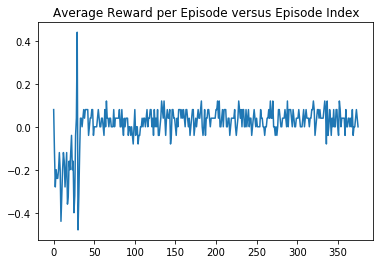

KeyboardInterrupt: 

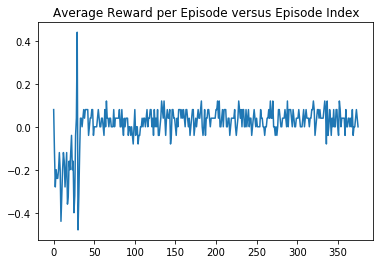

In [42]:
%%time

env = CircularWorld()
qfunc = q_learning_impl_v3.KerasModelQFunction(
    env, (6, 6, 6), learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)
callback_func = run_callback_function.MonitoringCallback()

q_learning_v3.SimpleRun(
    env_factory=WorldMaker, qfunc=qfunc, policy=policy,
    num_of_episode=1000, callback_func=callback_func,
    debug_verbosity=0)

In [46]:
%%time

env = CircularWorld()
qfunc = q_learning_impl_v3.KerasModelQFunction(
    env, (6, 6, 6), learning_rate=0.9, discount_factor=0.95)
policy = policy_impl.MaxValueWithRandomnessPolicy(certainty = 0.9)
callback_func = run_callback_function.MonitoringCallback()

q_learning_v3.DQNRun(
    env_factory=WorldMaker, qfunc=qfunc, policy=policy,
    num_of_episode=1000,
    experience_history_capacity=1, num_training_samples=1, training_every_steps=1,
    callback_func=callback_func,
    debug_verbosity=10)

GET: ([8], 0) -> [[0.10453147]]
GET: ([8], 1) -> [[0.02928388]]
GET: ([8], 2) -> [[0.12144433]]
Action 2: ([8]) -> ([9]), reward: -1.0
SET: ([8], 2) <- [[-0.7707947]]
GET: ([9], 0) -> [[0.06641512]]
GET: ([9], 1) -> [[-0.01526858]]
GET: ([9], 2) -> [[0.08102468]]
Action 2: ([9]) -> ([10]), reward: -1.0
SET: ([9], 2) <- [[-0.8127007]]
GET: ([10], 0) -> [[0.02182258]]
GET: ([10], 1) -> [[-0.05594504]]
GET: ([10], 2) -> [[0.03423749]]
<use random choice>
Action 1: ([10]) -> ([10]), reward: -1.0
SET: ([10], 1) <- [[-0.87632143]]
GET: ([10], 0) -> [[-0.00306582]]
GET: ([10], 1) -> [[-0.07705119]]
GET: ([10], 2) -> [[0.00890221]]
Action 2: ([10]) -> ([0]), reward: -1.0
SET: ([10], 2) <- [[-0.9436782]]
GET: ([0], 0) -> [[-0.07227153]]
GET: ([0], 1) -> [[-0.07119998]]
GET: ([0], 2) -> [[-0.07205693]]
Action 1: ([0]) -> ([0]), reward: -1.0
SET: ([0], 1) <- [[-0.96799594]]
GET: ([0], 0) -> [[-0.0902733]]
GET: ([0], 1) -> [[-0.08919148]]
GET: ([0], 2) -> [[-0.09006599]]
Action 1: ([0]) -> ([0]), 

KeyboardInterrupt: 